In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
# above code install all libraries 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\Shanu\Desktop\Elevate Task\Titanic-Dataset.csv')#this read data which is located at specific path
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [25]:
print(data.info())# overview od data frame
print(data.isnull().sum())# checking null value in column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [35]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [37]:
data.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [39]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [41]:
print(data.head())
print(data.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN       False        True  
1          PC 17599  71.2833   C85       False       False  
2  STON/O2. 3101282   7.9250   NaN       False        True  
3            113803  53.1000  C123       False      

In [43]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [47]:
#we take age and fare to noramlizie
cols = ['Age', 'Fare']
data[cols] = (data[cols] - data[cols].min()) / (data[cols].max() - data[cols].min())

In [49]:
print(data[cols].describe())

              Age        Fare
count  891.000000  891.000000
mean     0.367921    0.062858
std      0.163383    0.096995
min      0.000000    0.000000
25%      0.271174    0.015440
50%      0.367921    0.028213
75%      0.434531    0.060508
max      1.000000    1.000000


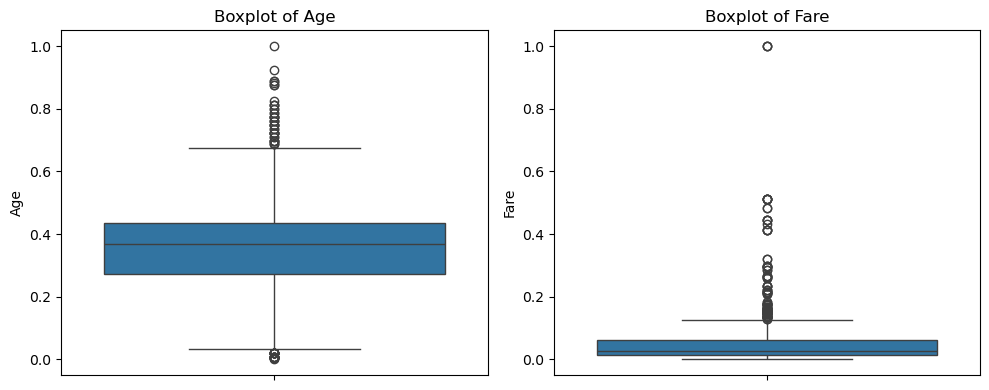

In [51]:
plt.figure(figsize=(10, 4)) # it mean fifure size should10,4
plt.subplot(1, 2, 1)# dividecanvasin 1row 2 clumns
sns.boxplot(y=data['Age'])
plt.title('Boxplot of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()


In [57]:
# we will remove it by iqr method
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]


In [59]:
data = remove_outliers_iqr(data, 'Age')
data = remove_outliers_iqr(data, 'Fare')# removing outliers

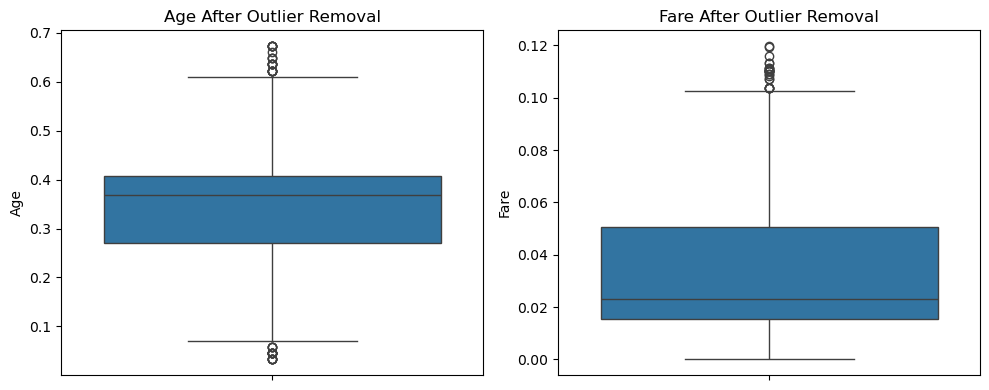

In [63]:
# checking outliers is removed or not
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Age'])
plt.title('Age After Outlier Removal')
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Fare'])
plt.title('Fare After Outlier Removal')
plt.tight_layout()
plt.show()
